let the csv posses this file....

the dataset have NA column in one row, bcs it just one i will delete it with dropna bcs it only one, after that i will save to another csv.... i just realize that it have many NA in Gender... i will use decision tree

In [2]:
import pandas as pd

df = pd.read_csv("penguins.csv")
df = df.dropna(how='all')
print(df.head())
print("----------------------------------------")
print(df.tail())
print("----------------------------------------")
print(df.dtypes)
print("----------------------------------------")
df.to_csv("cleanedIndependentPenguins.csv", index=False)
print("printed")
df["sex"] = pd.to_numeric(df["sex"], errors="coerce")
print (df["sex"])


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE
----------------------------------------
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
338              47.2             13.7              214.0       4925.0  FEMALE
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE
-----------------------

null data check

In [3]:
import pandas as pd

df = pd.read_csv("cleanedIndependentPenguins.csv", na_values=["", " ",".","unknown"])
print (df["sex"].isna().sum())

8


In [4]:

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("cleanedIndependentPenguins.csv")

encoder_code = LabelEncoder()
df["sex"] = encoder_code.fit_transform(df["sex"])

data_with_sex = df[df["sex"].notna()]
data_with_nan = df[df["sex"].isna()]

from sklearn.tree import DecisionTreeClassifier
X = data_with_sex[['body_mass_g','culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
y = data_with_sex["sex"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=32)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# X_nan = data_with_nan[df.drop("sex",axis=1)]
X_nan = data_with_nan[['body_mass_g','culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
predicted_values = model.predict(X_nan)

df.loc[df["sex"].isna(), "sex"] = predicted_values
df.to_csv("testDecisionTreePenguins.csv", index= False)
print ("suda di print")

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by DecisionTreeClassifier.

In [5]:
# seperate the data

df = pd.read_csv("cleanedIndependentPenguins.csv", na_values=["", " ",".","unknown"])

data_with_sex = df[df["sex"].notna()]
data_with_nan = df[df["sex"].isna()]

print(data_with_nan.head())

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["sex"] = labelencoder.fit_transform(df["sex"])
print (df.head())

X = data_with_sex[['body_mass_g','culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
y = data_with_sex["sex"]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=39)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)
print("-------------------------")
print(data_with_nan.shape)
print("-------------------------")

X_nan = data_with_nan[['body_mass_g','culmen_length_mm','culmen_depth_mm','flipper_length_mm']]
print(X_nan.shape)
predicted_values = model.predict(X_nan)
df.loc[df["sex"].isna(), "sex"] = predicted_values


# print(f"Jumlah prediksi: {len(predicted_values)}")
# print(f"Jumlah baris kosong di 'sex': {data_with_nan.shape[0]}")

# nan_indices = df[df["sex"].isna()].index
# print(f"Indeks yang kosong: {nan_indices}")
# df.loc[nan_indices, "sex"] = predicted_values


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
7                34.1             18.1              193.0       3475.0  NaN
9                37.8             17.1              186.0       3300.0  NaN
10               37.8             17.3              180.0       3700.0  NaN
46               37.5             18.9              179.0       2975.0  NaN
245              44.5             14.3              216.0       4100.0  NaN
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0    1
1              39.5             17.4              186.0       3800.0    0
2              40.3             18.0              195.0       3250.0    0
3              36.7             19.3              193.0       3450.0    0
4              39.3             20.6              190.0       3650.0    1
-------------------------
(8, 5)
-------------------------
(8, 4)


ValueError: Must have equal len keys and value when setting with an iterable

i will learn knn later

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Load data
df = pd.read_csv("cleanedIndependentPenguins.csv", na_values=["", " ", ".", "unknown"])

# Encode kolom 'sex' menjadi format numerik
labelencoder = LabelEncoder()
df["sex_encoded"] = labelencoder.fit_transform(df["sex"])

# Fitur yang digunakan
features = ['body_mass_g', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

# Inisialisasi KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputasi kolom numerik
df[features] = knn_imputer.fit_transform(df[features])

# Imputasi kolom 'sex_encoded'
df["sex_encoded"] = knn_imputer.fit_transform(df[["sex_encoded"]])

# Batasi nilai di 'sex_encoded' agar tetap valid
df["sex_encoded"] = df["sex_encoded"].clip(0, 1).round().astype(int)

# Konversi kembali ke string
df["sex"] = labelencoder.inverse_transform(df["sex_encoded"])

# Debug: Periksa hasil akhir
print("Unique values in 'sex_encoded':", df["sex_encoded"].unique())
print("Jumlah NaN di kolom 'sex':", df["sex"].isna().sum())
print(df[["sex_encoded", "sex"]].head())

# Hapus kolom tambahan dan simpan
df = df.drop(columns=["sex_encoded"])
df.to_csv("testpunyagpt.csv", index=False)
print("File CSV berhasil dibuat: 'testpunyagpt.csv'")


Unique values in 'sex_encoded': [1 0]
Jumlah NaN di kolom 'sex': 0
   sex_encoded     sex
0            1    MALE
1            0  FEMALE
2            0  FEMALE
3            0  FEMALE
4            1    MALE
File CSV berhasil dibuat: 'testpunyagpt.csv'


done datasetcleaned but its from gpt, maybe i will try to explain whatever i know about that knn im not gonna deep down into knn yet bcs its still k-means

once it clean we can use it to predict the k-means

first check the data first, make sure it already cleaned enough :)

In [7]:
import pandas as pd

df = pd.read_csv("testpunyagpt.csv")
print (df.info)
print ("--------------------------------------------")
print (df.dtypes)
print ("--------------------------------------------")
print (df.isnull().sum())

<bound method DataFrame.info of      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                36.7             19.3              193.0       3450.0  FEMALE
4                39.3             20.6              190.0       3650.0    MALE
..                ...              ...                ...          ...     ...
337              47.2             13.7              214.0       4925.0  FEMALE
338              46.8             14.3              215.0       4850.0  FEMALE
339              50.4             15.7              222.0       5750.0    MALE
340              45.2             14.8              212.0       5200.0  FEMALE
341              49.9             16.1              213.0       5400.0    MALE

[342 rows x 5 colum

jfieuijhuew
im from future... one of your column has outlier.... now check it first the flipper lenght
lets look for the IQR first

In [20]:
df = pd.read_csv("testpunyagpt.csv")
Q1 = df['flipper_length_mm'].quantile(0.25)
Q3 = df['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print (f"we got the IQR which is {lower_bound} and {upper_bound}")


we got the IQR which is 154.375 and 249.375


now lets apply the winsorizing

In [21]:
df["flipper_length_mm"] = df['flipper_length_mm'].clip(lower=lower_bound, upper=upper_bound)
df.to_csv("cleanedPenguins.csv")
print ("imported")

imported


after that we gonna normalize it

In [22]:
from sklearn.preprocessing import LabelEncoder
encodethis = LabelEncoder()

data = pd.read_csv("cleanedPenguins.csv")
df = pd.DataFrame(data)
df["sex"] = encodethis.fit_transform(df['sex'])

df_not_normalize = df.drop(columns=['sex'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_not_normalize)

df_normalized = pd.DataFrame(df_normalized, columns= df_not_normalize.columns)
df_normalized['sex'] = df['sex']
print (df_normalized)

     Unnamed: 0  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0     -1.726994         -0.884499         0.785449          -1.377529   
1     -1.716865         -0.811126         0.126188          -1.032479   
2     -1.706736         -0.664380         0.430462          -0.411387   
3     -1.696607         -1.324737         1.089724          -0.549408   
4     -1.686478         -0.847812         1.748985          -0.756438   
..          ...               ...              ...                ...   
337    1.686478          0.601305        -1.750171           0.899806   
338    1.696607          0.527932        -1.445897           0.968816   
339    1.706736          1.188289        -0.735923           1.451887   
340    1.716865          0.234440        -1.192335           0.761785   
341    1.726994          1.096572        -0.533073           0.830795   

     body_mass_g  sex  
0      -0.564142    1  
1      -0.501703    0  
2      -1.188532    0  
3      -0.938776    0  
4  

the sex column werent normalized bcs i thought it was already label encoder/ 1 and 0 so it wouldnt be nessecary (my thought) cmiiw

update : alr its changed

next lets find the cluster

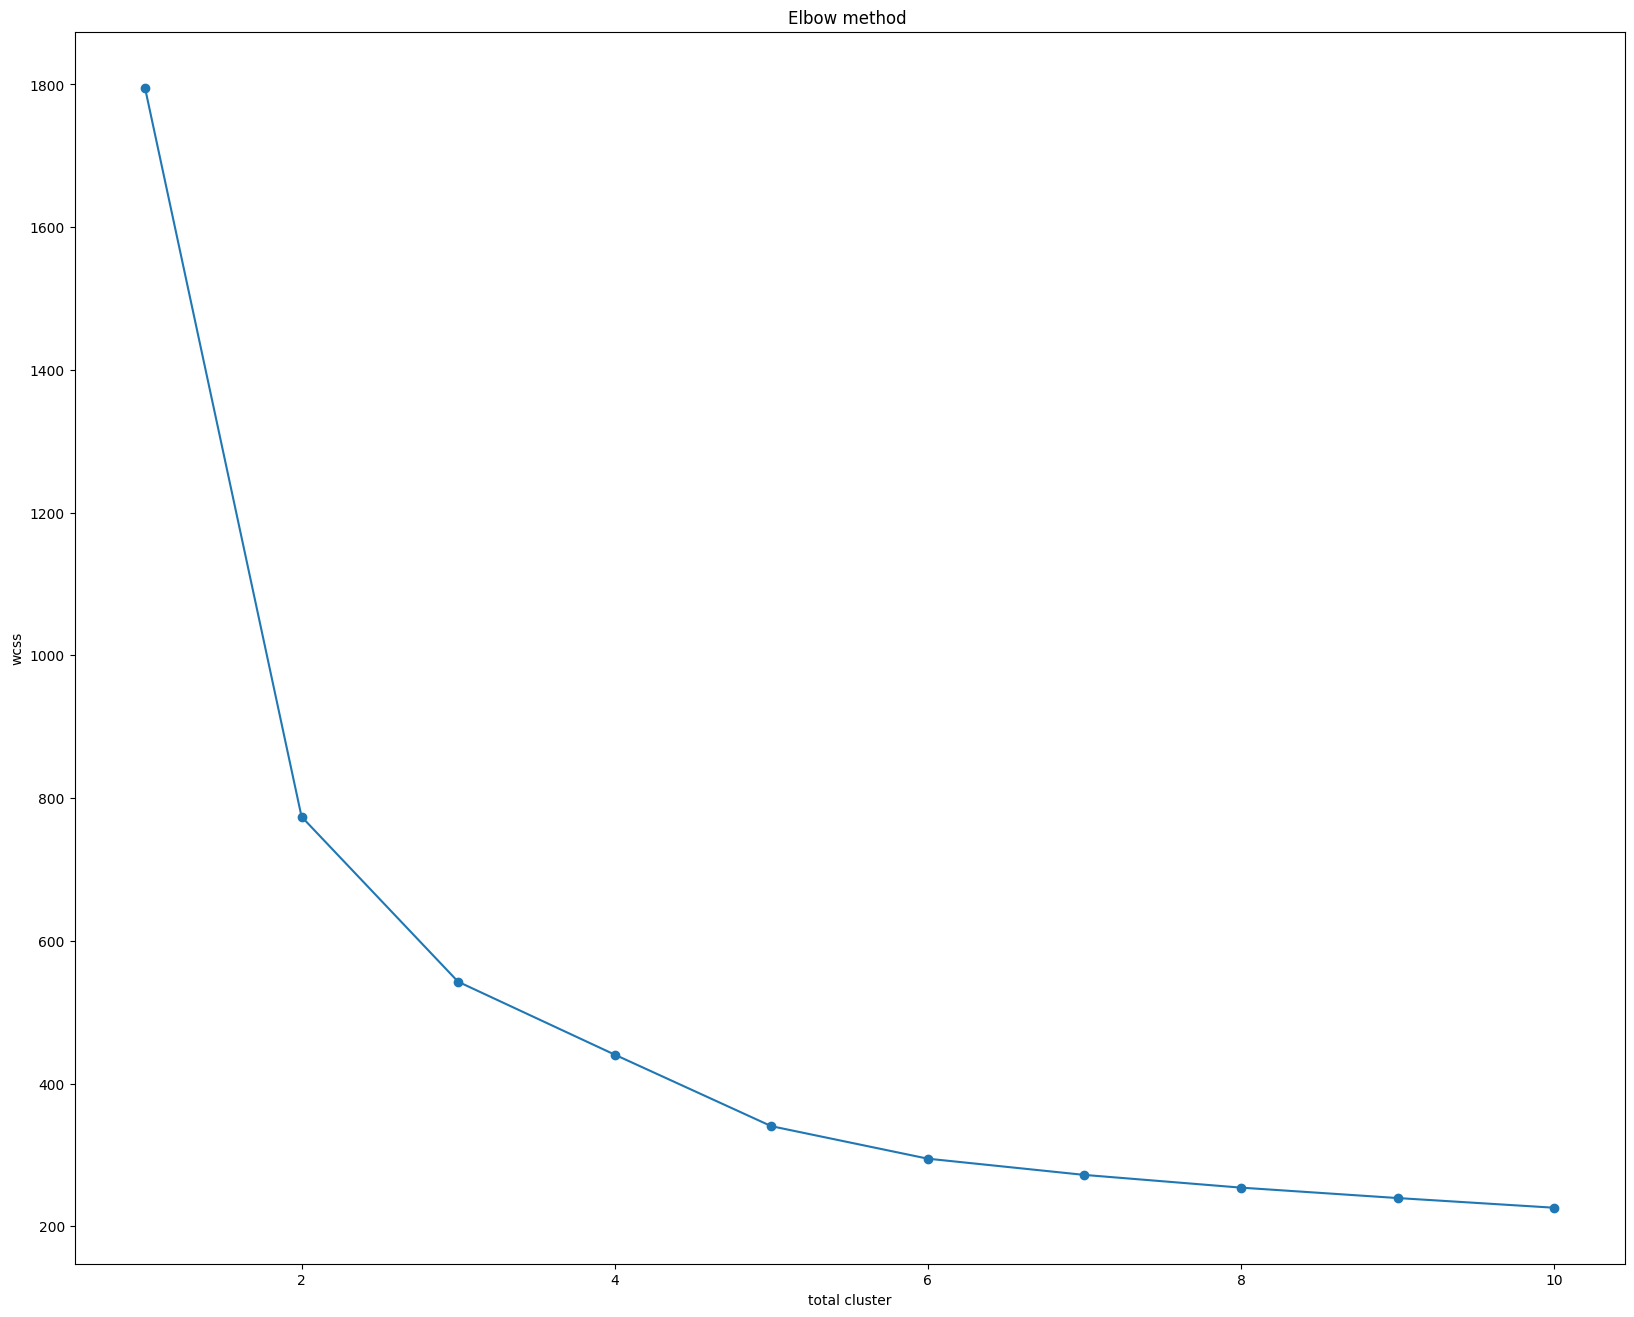

In [23]:
from sklearn.cluster import KMeans

wcss = []
for k in range (1 , 11) :
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter=300, n_init=10, random_state=55)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt



plt.figure(figsize=(20,16))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow method ")
plt.xlabel("total cluster")
plt.ylabel("wcss")
plt.show()



idk what to choose between 4 or 6, maybe i will try silloutte score

update : this is also changed

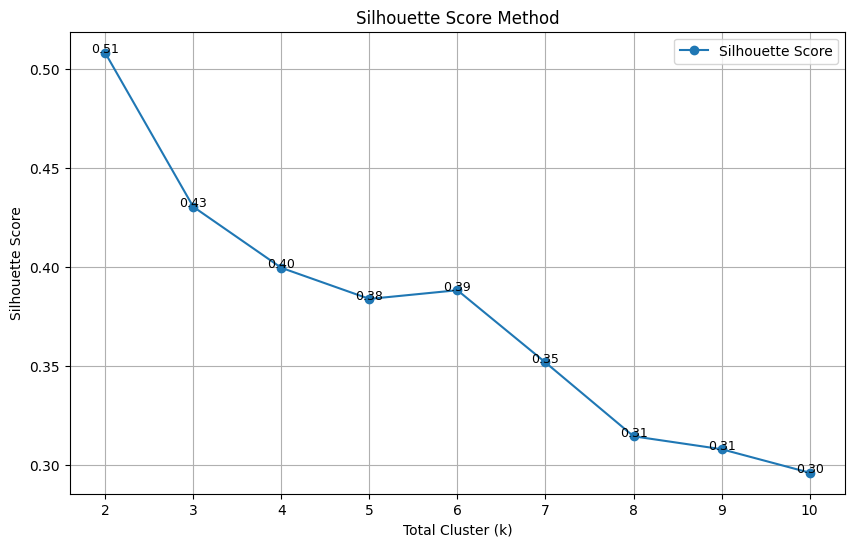

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range (2 , 11) :
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter=300, n_init=10, random_state=29)
    kmeans.fit(df_normalized)
    labels = kmeans.labels_
    score = silhouette_score(df_normalized, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o", label="Silhouette Score")
for i, score in enumerate(silhouette_scores):
    plt.text(i + 2, score, f"{score:.2f}", fontsize=9, ha="center")
plt.title("Silhouette Score Method")
plt.xlabel("Total Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()
plt.show()

why 7 and 3 are the higher and not 6 :((
alr after i ask ai, it guides me to choose the short one, which is 3, but this dataset is about penguins, and i just search types of penguins
and i got at least 17 - 19 types of them
so yeah i will go with 7


update : THIS CHANGED TO 2 OMG

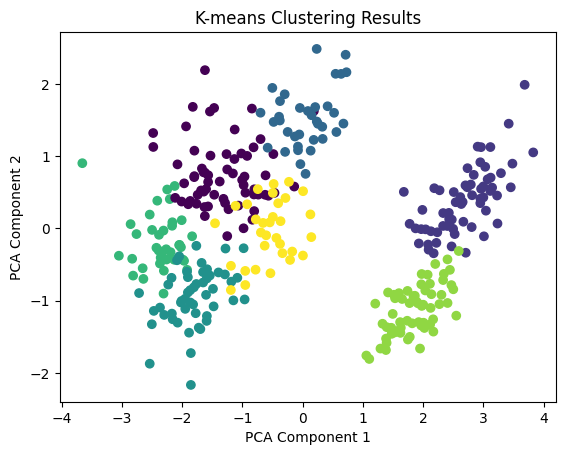

In [25]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


um idk if this good or not.. maybe i will try to check the outlier

update : im not gonna change this

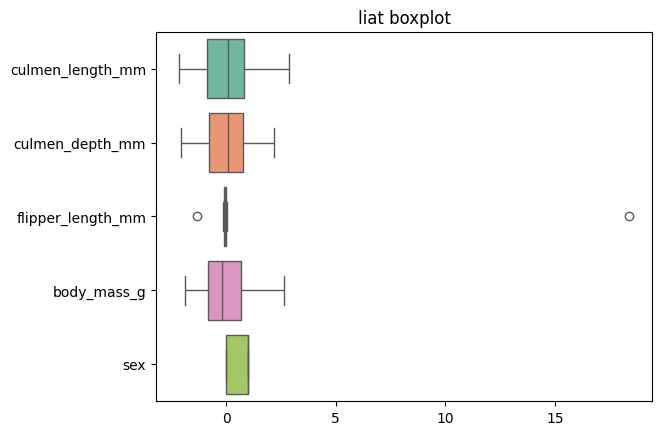

In [19]:
import seaborn as sns

plt.Figure(figsize=(12, 6))
sns.boxplot(data= df_normalized, orient='h', palette="Set2")
plt.title("liat boxplot")
plt.show()

well this made me want to check every dataset i have... anyway lets fix it 
* going back to past

update : im not gonna change this

i will try to check the box plot again after the updates

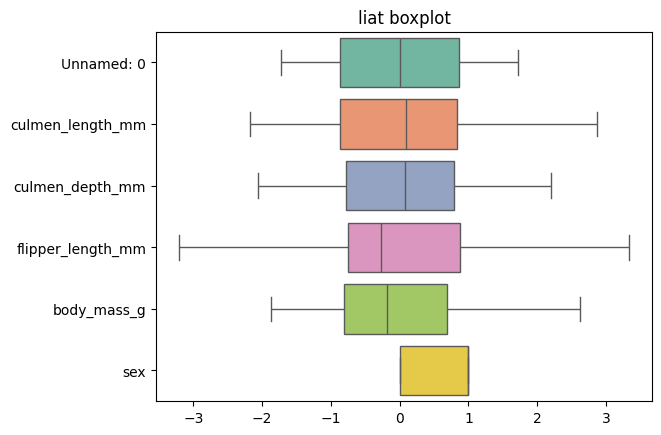

In [26]:
plt.Figure(figsize=(12, 6))
sns.boxplot(data= df_normalized, orient='h', palette="Set2")
plt.title("liat boxplot")
plt.show()

alr it is already good

final k-means

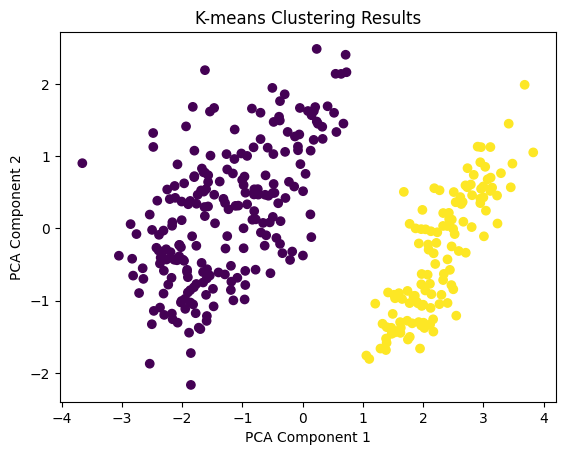

In [27]:

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

df.to_csv("2PenguinsClustered.csv")

idk if this true or not, bcs if you take look of the elbow method i assume i will have 3 or 5 cluster, siloutte gave 2 cluster tho

im realy confused.... should i trust elbow or siloutte
if in logical... this is penguin, they have a lot of species

uhh i will try what happen if i change to 3 and 5 

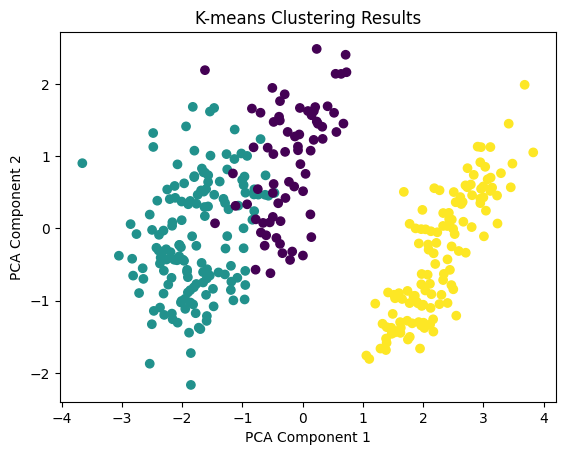

In [28]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

df.to_csv("3PenguinsClustered.csv")


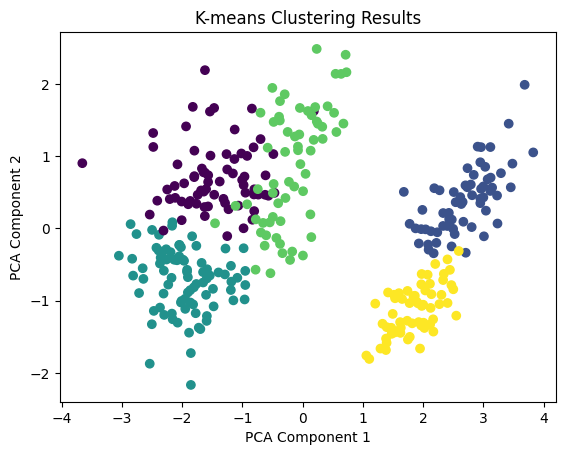

In [29]:

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

df.to_csv("5PenguinsClustered.csv")


uhh these are confusing.... 
which one i choose... 

i will try evaluate them one by one

In [31]:
df2 = pd.read_csv("2PenguinsClustered.csv")
df3 = pd.read_csv("3PenguinsClustered.csv")
df5 = pd.read_csv("5PenguinsClustered.csv")

from sklearn.metrics import davies_bouldin_score
db_index2 = davies_bouldin_score(df2, kmeans.labels_)
print(f"df2 = {db_index2}")
db_index3 = davies_bouldin_score(df3, kmeans.labels_)
print(f"df3 = {db_index3}")
db_index5 = davies_bouldin_score(df5, kmeans.labels_)
print(f"df5 = {db_index5}")

print ("----------------------")

from sklearn.metrics import calinski_harabasz_score
db_index2 = calinski_harabasz_score(df2, kmeans.labels_)
print(f"df2 = {db_index2}")
db_index3 = calinski_harabasz_score(df3, kmeans.labels_)
print(f"df3 = {db_index3}")
db_index5 = calinski_harabasz_score(df5, kmeans.labels_)
print(f"df5 = {db_index5}")

print ("----------------------")

from sklearn.metrics import silhouette_score

sil_score2 = silhouette_score(df2, kmeans.labels_)
print(f"Silhoutte Skor 2: {sil_score2} ") 
sil_score3 = silhouette_score(df3, kmeans.labels_)
print(f"Silhoutte Skor 3: {sil_score3} ") 
sil_score5 = silhouette_score(df5, kmeans.labels_)
print(f"Silhoutte Skor 5: {sil_score5} ") 


df2 = 1.2317081546769904
df3 = 1.231704961193509
df5 = 1.2316742025742786
----------------------
df2 = 462.8284978035181
df3 = 462.8286680677015
df5 = 462.82988762975936
----------------------
Silhoutte Skor 2: 0.21929173732459858 
Silhoutte Skor 3: 0.21929362047310874 
Silhoutte Skor 5: 0.2193078270554185 


davies = df5

calinski = df2

silloutte ofc = df2

idk who to ask but chat gpt ask me to focus on siloutte if elbow and siloutte had different

i think this is what data said.. 2 species

updated : i forgot to change the sex back into male female

In [46]:
df2 = pd.read_csv("2PenguinsClustered.csv")
df3 = pd.read_csv("3PenguinsClustered.csv")
df5 = pd.read_csv("5PenguinsClustered.csv")

df2['sex'] = df2['sex'].replace({1: 'Male', 0: 'Female'})
df2.to_csv("2UpdatedPenguins.csv")
print("ok")

df3['sex'] = df3['sex'].replace({1: 'Male', 0: 'Female'})
df3.to_csv("3UpdatedPenguins.csv")
print("ok")

df5['sex'] = df5['sex'].replace({1: 'Male', 0: 'Female'})
df5.to_csv("5UpdatedPenguins.csv")
print("ok")

ok
ok
ok


Analysis dataset clustered df2

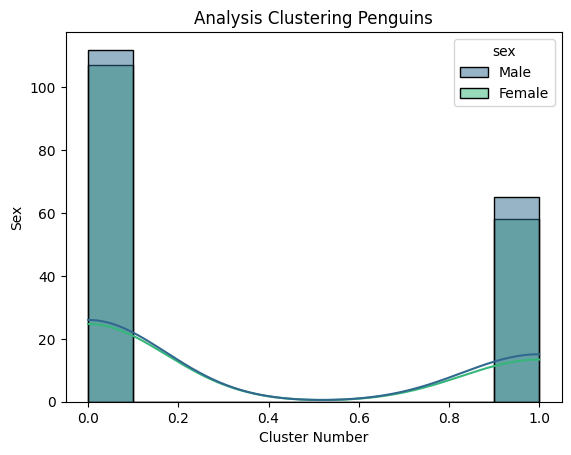

In [47]:
df = pd.read_csv('2UpdatedPenguins.csv')

sns.histplot(data=df, x='Cluster', hue="sex", kde=True, palette="viridis")
plt.title("Analysis Clustering Penguins")
plt.xlabel("Cluster Number")
plt.ylabel("Sex")
plt.show()

in both cluster.. much male penguins, but cluster number 0 has more entity of penguins than cluster 1

boxplot

this one i will not use sex, because its just crisp logic, instead i will use body mass... but first im curious abour the histplot and groupby

         Unnamed: 0  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
Cluster                                                                     
0             109.0         41.909589        18.369406         191.848174   
1             280.0         47.504878        14.982114         217.186992   

         body_mass_g       sex  
Cluster                         
0        3710.730594  0.511416  
1        5076.016260  0.528455  


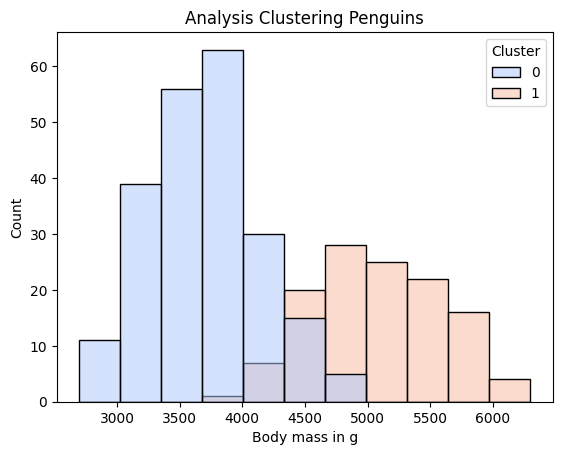

In [55]:
df = pd.read_csv("2PenguinsClustered.csv")
print (df.groupby('Cluster').mean())

sns.histplot(data=df, hue='Cluster', x="body_mass_g", kde=False, palette="coolwarm")
plt.title("Analysis Clustering Penguins")
plt.xlabel("Body mass in g")
plt.show()

from histplot i can conclude that cluster number 0 has the highest population of 3500 - 4000 body mass in g, meanwhile its decresed and fully stop when reaching 5kg

and 

cluster number 1 has the highest in population with body mass in g in maybe from 4700 - 5000 and it slowly decreased until 6000 g

C:\Users\User\AppData\Local\Temp\ipykernel_11236\2826140407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='body_mass_g',data=df, palette='Set1')


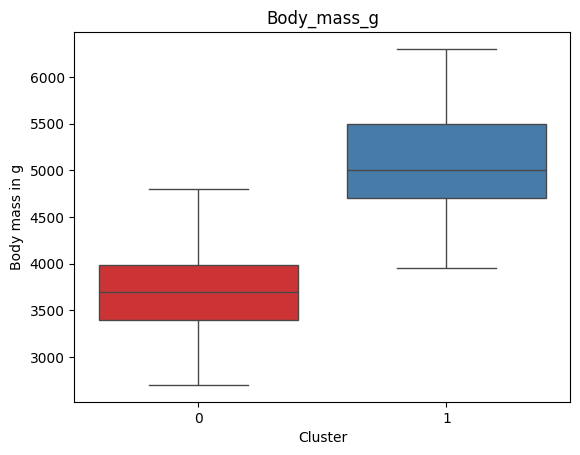

In [48]:
df = pd.read_csv('2UpdatedPenguins.csv')

sns.boxplot(x='Cluster', y='body_mass_g',data=df, palette='Set1')
plt.title("Body_mass_g")
plt.xlabel("Cluster")
plt.ylabel("Body mass in g")
plt.show()

about the boxplot

cluster number 0 has average penguin in 3700, meanwhile in cluster number 1 around 5000